# Modeling Exercises

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from pydataset import data

import wrangle_mall as w

1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c. Use the elbow method to visually select a good value for k.
    d. Repeat the clustering, this time with 3 different features.

In [2]:
df = data('iris')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# convert to snake-case hissssssssss sneeaaaakkkyyyy snek

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


In [6]:
# calculate area l x w
df['sepal_area'] = df['sepal_length'] * df['sepal_width']

In [7]:
df['petal_area'] = df['petal_length'] * df['petal_width']

In [8]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
1,5.1,3.5,1.4,0.2,setosa,17.85,0.28
2,4.9,3.0,1.4,0.2,setosa,14.70,0.28
3,4.7,3.2,1.3,0.2,setosa,15.04,0.26
4,4.6,3.1,1.5,0.2,setosa,14.26,0.30
5,5.0,3.6,1.4,0.2,setosa,18.00,0.28
6,5.4,3.9,1.7,0.4,setosa,21.06,0.68
7,4.6,3.4,1.4,0.3,setosa,15.64,0.42
8,5.0,3.4,1.5,0.2,setosa,17.00,0.30
9,4.4,2.9,1.4,0.2,setosa,12.76,0.28
10,4.9,3.1,1.5,0.1,setosa,15.19,0.15


In [9]:
# double-checked math; looks good. 
X = df[['sepal_area', 'petal_area']]

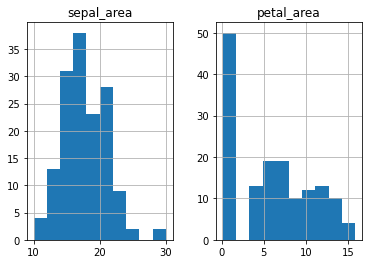

In [10]:
X.hist()
plt.show()

In [11]:
# Just going to pretend that I didn't need to split the data and scale it now. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

In [12]:
X_scaled.shape, df.shape
# correct number of rows. Groovy. 

((150, 2), (150, 7))

In [13]:
# sklearn implementation of KMeans on unscaled data

# Set the variable definition
# random_state is a jackpot, brother. 
kmeans = KMeans(n_clusters=4, random_state = 777)

# fit the KMeans onto X
kmeans.fit(X)

# Make predictions 
kmeans.predict(X)

array([0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 0, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [14]:
# sklearn implementation of KMeans on scaled data

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 777)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [15]:
# make a new column names cluster in original df and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)
df.cluster = df.cluster.astype('category')
X_scaled['cluster'] = kmeans.predict(X_scaled)
X_scaled.cluster = X_scaled.cluster.astype('category')

In [16]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
53,6.9,3.1,4.9,1.5,versicolor,21.39,7.35,1
130,7.2,3.0,5.8,1.6,virginica,21.60,9.28,0
142,6.9,3.1,5.1,2.3,virginica,21.39,11.73,0
4,4.6,3.1,1.5,0.2,setosa,14.26,0.30,2
75,6.4,2.9,4.3,1.3,versicolor,18.56,5.59,1


In [17]:
def viz_iris(df, kmeans):
    
    centroids = np.array(df.groupby('cluster')['petal_area', 'sepal_area'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    colors = ['#DF2020','#2095DF', '#81DF20' ]
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
    #plot scatter chart for Actual species and those predicted by K - Means

    #specify custom palette for sns scatterplot
    colors1 = ['#DF2020','#2095DF', '#81DF20']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    #plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = df, x = 'petal_area', y = 'sepal_area', ax = ax1, hue = 'species', palette=customPalette)
    plt.title('Actual Species')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(df.petal_area, df.sepal_area, c=df.c, alpha = 0.6)
    ax2.set(xlabel = 'petal_area', ylabel = 'sepal_area', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    plt.tight_layout()
    plt.show()

/var/folders/qn/sd1_3x2j4196db03067vql600000gn/T/ipykernel_2126/3259002275.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroids = np.array(df.groupby('cluster')['petal_area', 'sepal_area'].mean())


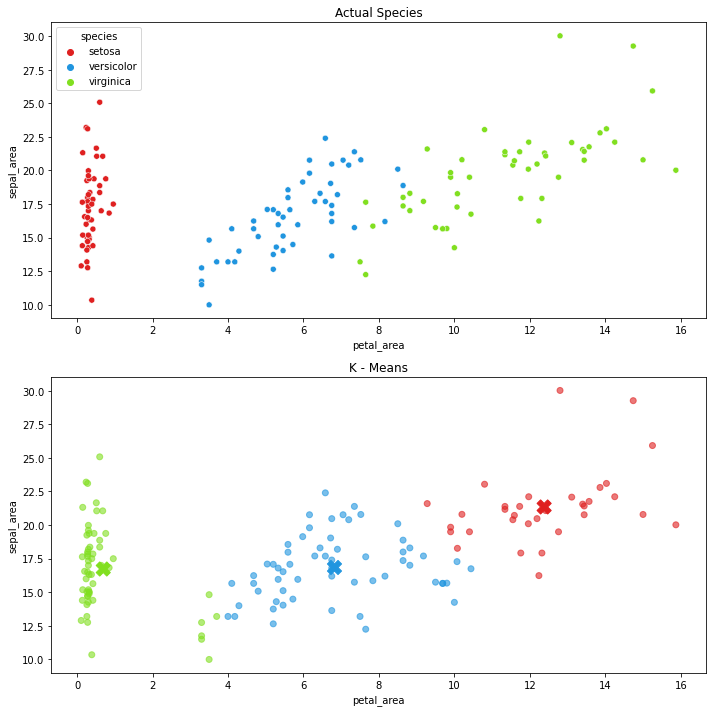

In [18]:
viz_iris(df, kmeans)

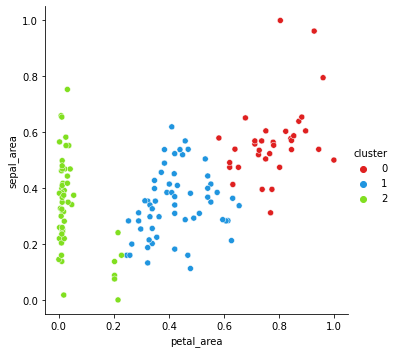

In [19]:
sns.relplot(data=X_scaled, y='sepal_area', x='petal_area', hue='cluster')

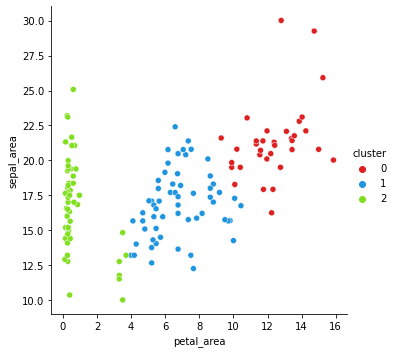

In [20]:
sns.relplot(data=df, y='sepal_area', x='petal_area', hue='cluster')

In [21]:
df.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
cluster,,,,,,
0,6.861765,3.108824,5.785294,2.141176,21.349412,12.378824
1,6.028333,2.788333,4.560000,1.478333,16.843833,6.822500
2,5.026786,3.314286,1.667857,0.328571,16.730714,0.694286


In [22]:
X_scaled.groupby('cluster').mean()

,sepal_area,petal_area
cluster,,
0,0.566904,0.778479
1,0.341850,0.425920
2,0.336200,0.037074


In [23]:
cluster_df = pd.get_dummies(df.cluster)
cluster_df.columns = [f'cluster_{n}' for n in cluster_df]

In [24]:
cluster_df.head()

,cluster_0,cluster_1,cluster_2
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1


In [25]:
from sklearn.linear_model import LinearRegression

x = cluster_df
y = df.petal_length

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.9256052604136461

In [26]:
x = cluster_df
y = df.petal_width

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.9684712379322105

In [27]:
x = cluster_df
y = df.sepal_width

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.8393217014683113

In [28]:
x = cluster_df
y = df.sepal_length

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.8406199437836852

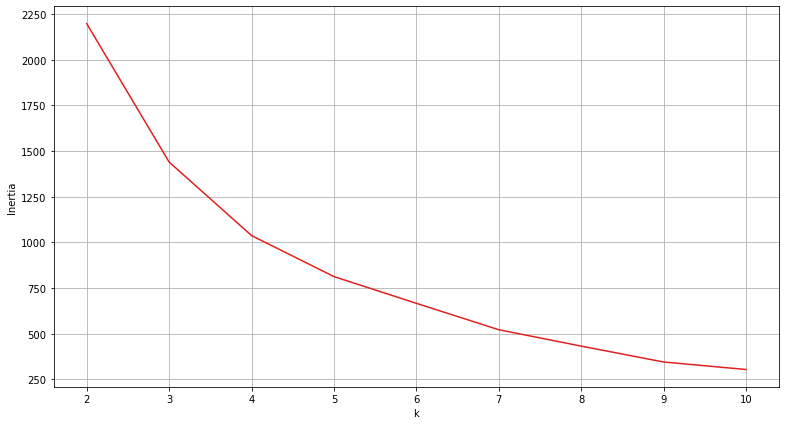

In [29]:
inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [30]:
species_dummies = pd.get_dummies(df.species)

In [31]:
df2 = pd.concat([df, species_dummies], axis=1)

In [32]:
df2

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster,cen_x,cen_y,c,setosa,versicolor,virginica
1,5.1,3.5,1.4,0.2,setosa,17.85,0.28,2,0.694286,16.730714,#81DF20,1,0,0
2,4.9,3.0,1.4,0.2,setosa,14.70,0.28,2,0.694286,16.730714,#81DF20,1,0,0
3,4.7,3.2,1.3,0.2,setosa,15.04,0.26,2,0.694286,16.730714,#81DF20,1,0,0
4,4.6,3.1,1.5,0.2,setosa,14.26,0.30,2,0.694286,16.730714,#81DF20,1,0,0
5,5.0,3.6,1.4,0.2,setosa,18.00,0.28,2,0.694286,16.730714,#81DF20,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica,20.10,11.96,0,12.378824,21.349412,#DF2020,0,0,1
147,6.3,2.5,5.0,1.9,virginica,15.75,9.50,1,6.822500,16.843833,#2095DF,0,0,1
148,6.5,3.0,5.2,2.0,virginica,19.50,10.40,0,12.378824,21.349412,#DF2020,0,0,1
149,6.2,3.4,5.4,2.3,virginica,21.08,12.42,0,12.378824,21.349412,#DF2020,0,0,1


In [33]:
X = df2[['virginica', 'versicolor', 'setosa']]

In [34]:
# sklearn implementation of KMeans on unscaled data

# Set the variable definition
# random_state is a jackpot, brother. 
kmeans = KMeans(n_clusters=3, random_state = 777)

# fit the KMeans onto X
kmeans.fit(X)

# Make predictions 
kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [35]:
df2['cluster'] = kmeans.predict(X)
df2.cluster = df2.cluster.astype('category')

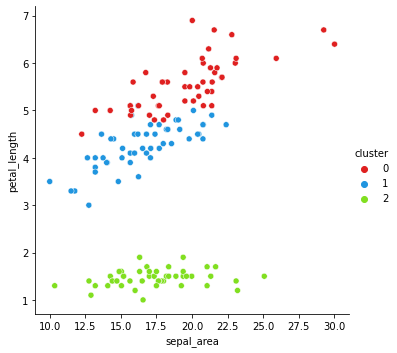

In [36]:
sns.relplot(data=df2, y='petal_length', x='sepal_area', hue='cluster')

# MEET ME AT THE MALL, it's going 
                                        DOWN

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [37]:
df = w.get_mallcustomer_data()

In [38]:
train, validate, test = w.prepare_mall(df)

Train: 112 rows, 4 cols
Validate: 48 rows, 4 cols
Test: 40 rows, 4 cols


In [39]:
train

,age,annual_income,spending_score,is_female
customer_id,,,,
124,39,69,91,False
77,45,54,53,True
172,28,87,75,False
11,67,19,14,False
36,21,33,81,True
...,...,...,...,...
176,30,88,86,True
102,49,62,48,True
149,34,78,22,True


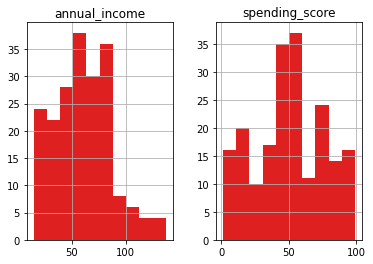

In [42]:
X = df[[ 'annual_income', 'spending_score']]
X.hist()
plt.show()

In [43]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [44]:
# sklearn implementation of KMeans on scaled data

# define
kmeans = KMeans(n_clusters=3, random_state = 777)

# fit
kmeans.fit(X_scaled)

# predict
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [46]:
# Create cluster column in original and X_scaled dfs

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [47]:
scaled_centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
scaled_centroids

,annual_income,spending_score
0,0.991583,1.239503
1,1.009200,-1.225535
2,-0.626190,-0.014392


In [60]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)

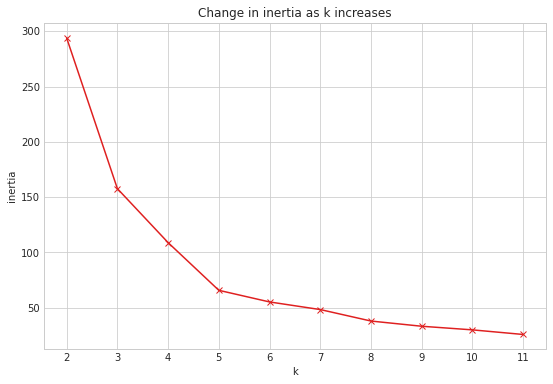

In [61]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    


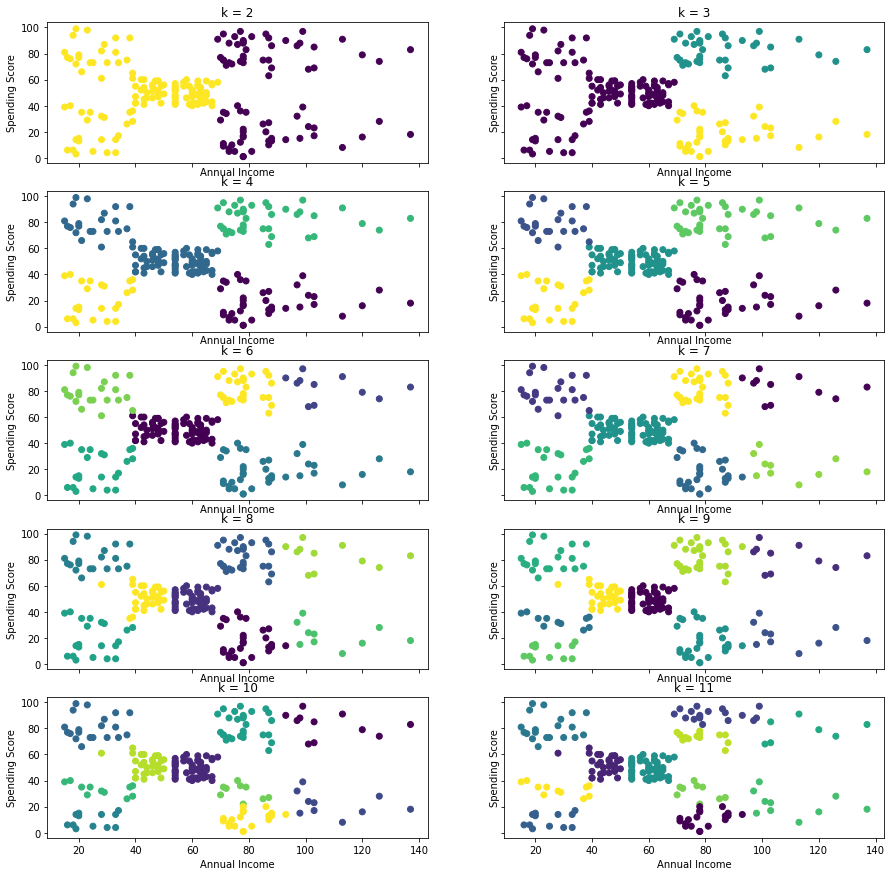

In [62]:
fig, axs = plt.subplots(5,2, figsize=(15, 15), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 12)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='Annual Income', ylabel='Spending Score')

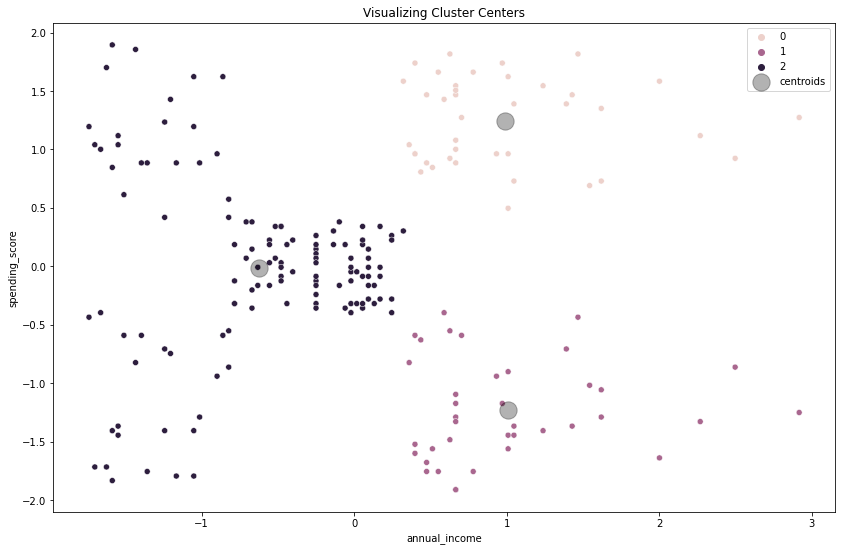

In [63]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'annual_income', y ='spending_score', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
scaled_centroids.plot.scatter(x = 'annual_income', y = 'spending_score',
                             ax = plt.gca(),
                             s= 300,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend()

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

The solutions to this can be seen above. 